<a href="https://colab.research.google.com/github/eunjaelim/deeplearning/blob/main/%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/data/lighting.zip'


Archive:  /content/drive/MyDrive/data/lighting.zip
   creating: Test/cloudy/
   creating: Test/earlyevening/
   creating: Test/morning/
   creating: Test/night/
   creating: Test/rain/
  inflating: Train/cloudy/1.cloudy.jpg  
  inflating: Train/cloudy/10.cloudy.jpg  
  inflating: Train/cloudy/2.cloudy.jpg  
  inflating: Train/cloudy/3.cloudy.jpg  
  inflating: Train/cloudy/4.cloudy.jpg  
  inflating: Train/cloudy/5.cloudy.jpg  
  inflating: Train/cloudy/6.cloudy.jpg  
  inflating: Train/cloudy/7.cloudy.jpg  
  inflating: Train/cloudy/8.cloudy.jpg  
  inflating: Train/cloudy/9.cloudy.jpg  
  inflating: Train/earlyevening/1.earlyevening.jpg  
  inflating: Train/earlyevening/10.earlyevening.jpg  
  inflating: Train/earlyevening/11.earlyevening.jpg  
  inflating: Train/earlyevening/12.earlyevening.jpg  
  inflating: Train/earlyevening/13.earlyevening.jpg  
  inflating: Train/earlyevening/14.earlyevening.jpg  
  inflating: Train/earlyevening/15.earlyevening.jpg  
  inflating: Train/earlyeve

In [3]:
# Train 사진의 10%를 Test 폴더로 이동

import os
import shutil
import glob


current_dir = os.getcwd()


# Train 사진의 10%를 Test 폴더로 이동

ratio = 0.1

Train_dir = os.path.join(current_dir, 'Train')
Test_dir = os.path.join(current_dir, 'Test')

label_name_list = os.listdir(Train_dir)
print(label_name_list)

#glob.glob(f'{Train_dir}Hanni/*')

for label_name in label_name_list:
    train_image_file_list = glob.glob(Train_dir+label_name+'/*')
    split_num = int(ratio*len(train_image_file_list))
    test_image_file_list = train_image_file_list[:split_num]

    for image_file in test_image_file_list:
        shutil.move(image_file, Test_dir+label_name)

['night', 'morning', 'rain', 'earlyevening', 'cloudy']


In [4]:
# Train 사진의 10%를 Test 폴더로 이동

ratio = 0.1

Train_dir = os.path.join(current_dir, 'Train/')
Test_dir = os.path.join(current_dir, 'Test/')

label_name_list = os.listdir(Train_dir)
print(label_name_list)

#glob.glob(f'{Train_dir}Hanni/*')

for label_name in label_name_list:
    train_image_file_list = glob.glob(Train_dir+label_name+'/*')
    split_num = int(ratio*len(train_image_file_list))
    test_image_file_list = train_image_file_list[:split_num]

    for image_file in test_image_file_list:
        shutil.move(image_file, Test_dir+label_name)


['night', 'morning', 'rain', 'earlyevening', 'cloudy']


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.applications import MobileNet, VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
# ImageDataGenerator() 객체 생성 - 데이터 증강 train_datagen, validation_datagen

train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range =20,
    width_shift_range = 0.2,
    height_shift_range= 0.2,
    shear_range =0.2,
    zoom_range =0.2,
    validation_split=0.2)

valdidation_datagen = ImageDataGenerator(
    rescale = 1./255.,
    validation_split=0.2)

In [7]:
# flow_from_directory() 활용

Train_dir = os.path.join(current_dir, 'Train')
Test_dir = os.path.join(current_dir, 'Test')

IMG_WIDTH = 224
IMG_HEIGHT = 224

train_generator = train_datagen.flow_from_directory(Train_dir,
                                                    subset='training',
                                                    class_mode ='binary',
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT))
validation_generator =valdidation_datagen.flow_from_directory(Train_dir,
                                                    subset='validation',
                                                    class_mode ='binary',
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT))


Found 47 images belonging to 5 classes.
Found 7 images belonging to 5 classes.


In [8]:
# 클래스 확인 class_indices
train_generator.class_indices

{'cloudy': 0, 'earlyevening': 1, 'morning': 2, 'night': 3, 'rain': 4}

In [9]:
# base_model 생성 - 전이학습 VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))
# base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))
base_model.trainable =False


58889256/58889256 [==============================] - 0s 0us/step


In [10]:
# Sequence 모델 생성
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(15, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [11]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(learning_rate=2e-5), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 32)                802848    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                495       
                                                                 
 dense_2 (Dense)             (None, 5)                 80        
                                                                 
Total params: 15518111 (59.20 MB)
Trainable params: 8034

In [12]:
# Modelcheckpoint 설정 후 모델 훈련
checkpoint_path = "best_model.h5"
checkpoint=ModelCheckpoint(filepath=checkpoint_path,
                           save_weights_only =True,
                           save_best_only =True,
                           monitor='val_loss',
                           verbose=1)

In [13]:
hist = model.fit(train_generator,
                 validation_data=validation_generator,
                 epochs=10,
                 callbacks=[checkpoint])

Epoch 1/10
2/2 [==============================] - ETA: 0s - loss: 1.7207 - accuracy: 0.1277 
Epoch 1: val_loss improved from inf to 1.69262, saving model to best_model.h5
2/2 [==============================] - 37s 25s/step - loss: 1.7207 - accuracy: 0.1277 - val_loss: 1.6926 - val_accuracy: 0.1429
Epoch 2/10
2/2 [==============================] - ETA: 0s - loss: 1.7117 - accuracy: 0.1489 
Epoch 2: val_loss improved from 1.69262 to 1.64637, saving model to best_model.h5
2/2 [==============================] - 37s 15s/step - loss: 1.7117 - accuracy: 0.1489 - val_loss: 1.6464 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - ETA: 0s - loss: 1.6073 - accuracy: 0.2979 
Epoch 3: val_loss improved from 1.64637 to 1.59914, saving model to best_model.h5
2/2 [==============================] - 35s 15s/step - loss: 1.6073 - accuracy: 0.2979 - val_loss: 1.5991 - val_accuracy: 0.1429
Epoch 4/10
2/2 [==============================] - ETA: 0s - loss: 1.5962 - accuracy: 0.2766

In [14]:
# 모델 검증
model.evaluate(validation_generator)

1/1 [==============================] - 4s 4s/step - loss: 1.4675 - accuracy: 0.4286


[1.4675006866455078, 0.4285714328289032]

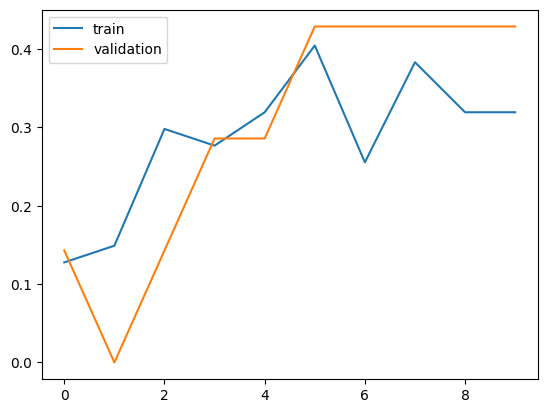

In [15]:
# 정확도 시각화
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

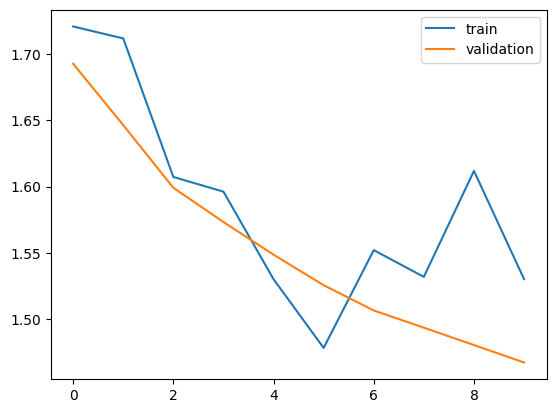

In [16]:
# loss 시각화
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [17]:
# 테스트 데이터셋 생성
test_datagen = ImageDataGenerator(rescale=1/255)

In [18]:
test_generator = test_datagen.flow_from_directory(Test_dir,
                                                  class_mode='binary',
                                                  target_size=(IMG_WIDTH, IMG_HEIGHT))

Found 6 images belonging to 5 classes.


In [19]:
model.evaluate(test_generator)

1/1 [==============================] - 5s 5s/step - loss: 1.6158 - accuracy: 0.3333


[1.615805983543396, 0.3333333432674408]

In [20]:
# 전체 테스트 데이터를 하나의 폴더에 모두 넣기
import random
import os
import numpy as np
import cv2
import glob

if not os.path.exists(os.path.join(current_dir, 'Test_files')):
    os.mkdir(os.path.join(current_dir, 'Test_files'))


In [21]:
label_name_list = os.listdir('/content/Test')
print(label_name_list)

for label_name in label_name_list:
    image_file_list = glob.glob(f'Test/{label_name}/*')

    for image_file in image_file_list:
        shutil.copy(image_file, 'Test_files')

['night', 'morning', 'rain', 'earlyevening', 'cloudy']


OpenCV로 이미지 다루기 - 초간단 실습

In [23]:
import cv2

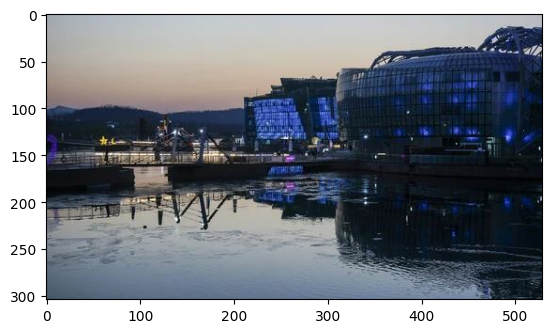

In [28]:
img = cv2.imread('/content/Test_files/4.earlyevening.jpg',cv2.IMREAD_COLOR)
# img = cv2.imread('/content/Test_files/4.earlyevening.jpg',cv2.IMREAD_GRAYSCALE)
# BGR - > RGB로 변경
img_c = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_c)
plt.show()

In [ ]:
# ### 로컬 PC에서 사용
# cv2.imshow('img',img_c)
# cv2.waitkey(0)
# cv2.destroyAllWindows()

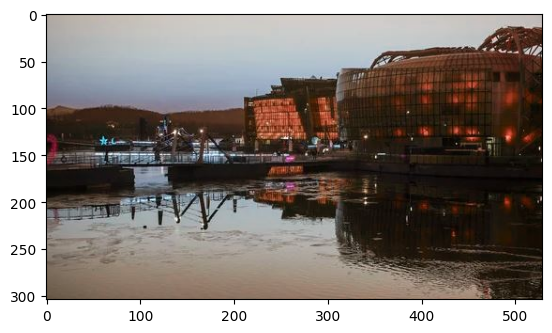

In [27]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [31]:
# 테스트할 이미지 데이터 시각화 준비
label_dict = {'cloudy':0,'earlyevening':1,'morning':3,'night':4,'rain':5}
test_image_files_list = glob.glob('/content/Test_files/*')
print(test_image_files_list)
print(len(test_image_files_list))

['/content/Test_files/10.rain.jpg', '/content/Test_files/9.night.jpg', '/content/Test_files/10.earlyevening.jpg', '/content/Test_files/4.earlyevening.jpg', '/content/Test_files/9.cloudy.jpg', '/content/Test_files/6.morning.jpg']
6


In [34]:
# 6개의 임의의 테스트 사진
import random
random.shuffle(test_image_files_list)
test_num=6
test_image_files = test_image_files_list[:test_num]

label_list = []

for i in range(len(test_image_files)):
  label = test_image_files[i].split('/')[-1].split('.')[1].strip()
  label_list.append(label_dict[label])
label_list

[0, 3, 5, 1, 4, 1]

In [41]:
import numpy as np
src_img_list = []

for i in range(len(test_image_files)):
  src_img = cv2.imread(test_image_files[i], cv2.IMREAD_COLOR)
  src_img = cv2.resize(src_img,dsize=(224,224))
  src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
  src_img = src_img / 255.0

  src_img_list.append(src_img)

#4차원 텐서 변환
src_image_array = np.array(src_img_list)
label_array = np.array(label_list)

print(src_image_array.shape,label_array.shape)

(6, 224, 224, 3) (6,)


In [43]:
pred = model.predict(src_image_array)

1/1 [==============================] - 4s 4s/step


In [44]:
pred.shape

(6, 5)

In [45]:
pred[0]

array([0.17827731, 0.3271508 , 0.12503128, 0.21574064, 0.15380003],
      dtype=float32)

IndexError: ignored

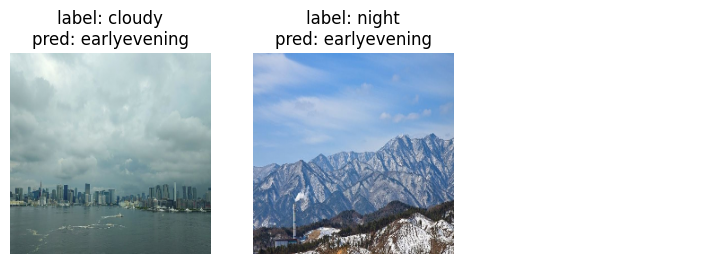

In [51]:
class_names = ['cloudy','earlyevening','morning','night','rain']
plt.figure(figsize=(12,12))

for pos in range(len(pred)):
  plt.subplot(4,4,pos+1)
  plt.axis('off')

  label_str = class_names[label_array[pos]]
  pred_str = class_names[np.argmax(pred[pos])]

  plt.title('label: '+label_str + '\npred: ' + pred_str)

  plt.imshow(src_image_array[pos])
plt.show()